In [10]:
import os
import pandas as pd

from eval_utils import get_metrics_dict_for_path_selection_type, plot_bar_chart, get_simple_eval_metrics

ROOT = "/sailhome/esui/cs224u_final_project"

intersection max: 0.94
union max: 0.94
longest max: 0.94
majority max: 0.94
forward_negation max: 0.94
single_backward_neg max: 0.9266666666666666
backward_negation max: 0.9266666666666666
single_forward_neg max: 0.9266666666666666
baseline max: 0.9233333333333333
single_baseline max: 0.92
direction max: 0.91
single_forward max: 0.9033333333333333
all max: 0.86
forward_randomized_order max: 0.8466666666666667
forward_all max: 0.8466666666666667
single_backward max: 0.7766666666666666
backward_all max: 0.72
backward_randomized_order max: 0.6766666666666666


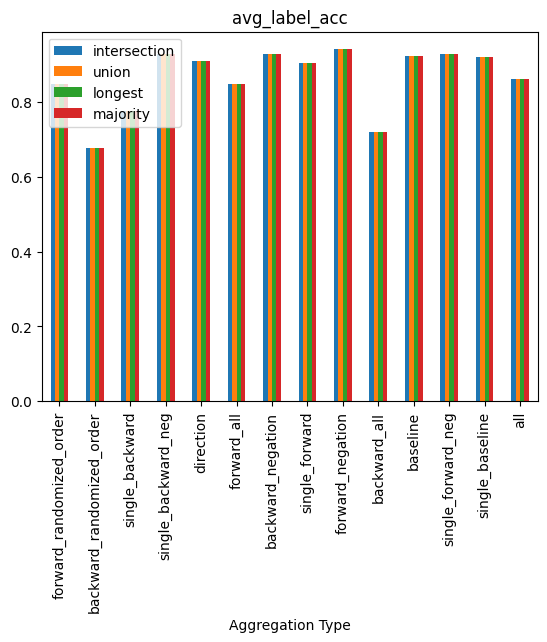

In [11]:
path_selection = "longest"
aggregate_path_glob = f'{ROOT}/prontoqa_output/fictional/aggregated/**/merge_answer_hard_*_path_select_{path_selection}.pkl'
metrics_dict, aggregation_types, merge_cot_types = get_metrics_dict_for_path_selection_type(aggregate_path_glob, path_selection)
columns = ['Aggregation Type'] + merge_cot_types

metric = "avg_label_acc"
plot_bar_chart(metric, columns, metrics_dict, aggregation_types, merge_cot_types)

union max: 0.39
intersection max: 0.38333333333333336
longest max: 0.38
majority max: 0.38
forward_negation max: 0.39
single_forward_neg max: 0.38333333333333336
single_backward_neg max: 0.38
single_forward max: 0.37
single_baseline max: 0.36666666666666664
direction max: 0.36333333333333334
backward_negation max: 0.36
baseline max: 0.34
forward_all max: 0.31666666666666665
forward_randomized_order max: 0.2833333333333333
all max: 0.27666666666666667
backward_all max: 0.21666666666666667
single_backward max: 0.13666666666666666
backward_randomized_order max: 0.13333333333333333


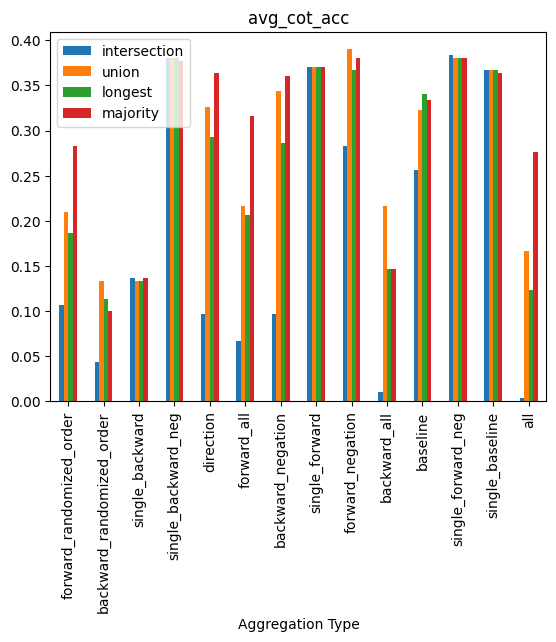

In [12]:
metric = "avg_cot_acc"
plot_bar_chart(metric, columns, metrics_dict, aggregation_types, merge_cot_types)

none max: 0.94
forward_negation max: 0.94
single_backward_neg max: 0.9266666666666666
backward_negation max: 0.9266666666666666
single_forward_neg max: 0.9266666666666666
baseline max: 0.9233333333333333
single_baseline max: 0.92
direction max: 0.91
single_forward max: 0.9033333333333333
all max: 0.85
forward_randomized_order max: 0.8466666666666667
forward_all max: 0.7966666666666666
single_backward max: 0.7766666666666666
backward_randomized_order max: 0.6766666666666666
backward_all max: 0.63


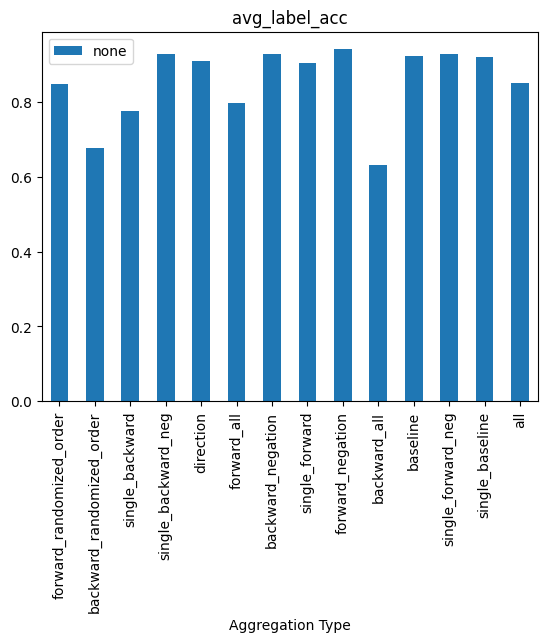

In [14]:
path_selection = "heaviest"
aggregate_path_glob = f'{ROOT}/prontoqa_output/fictional/aggregated/**/merge_answer_hard_*_path_select_{path_selection}.pkl'
metrics_dict, aggregation_types, merge_cot_types = get_metrics_dict_for_path_selection_type(aggregate_path_glob, path_selection)

columns = ['Aggregation Type'] + merge_cot_types

metric = "avg_label_acc"
plot_bar_chart(metric, columns, metrics_dict, aggregation_types, merge_cot_types)

none max: 0.3933333333333333
forward_negation max: 0.3933333333333333
single_forward_neg max: 0.38333333333333336
single_backward_neg max: 0.38
backward_negation max: 0.38
single_forward max: 0.37
baseline max: 0.37
single_baseline max: 0.36333333333333334
direction max: 0.36
forward_all max: 0.2866666666666667
all max: 0.28
forward_randomized_order max: 0.24333333333333335
backward_all max: 0.20666666666666667
backward_randomized_order max: 0.14666666666666667
single_backward max: 0.13666666666666666


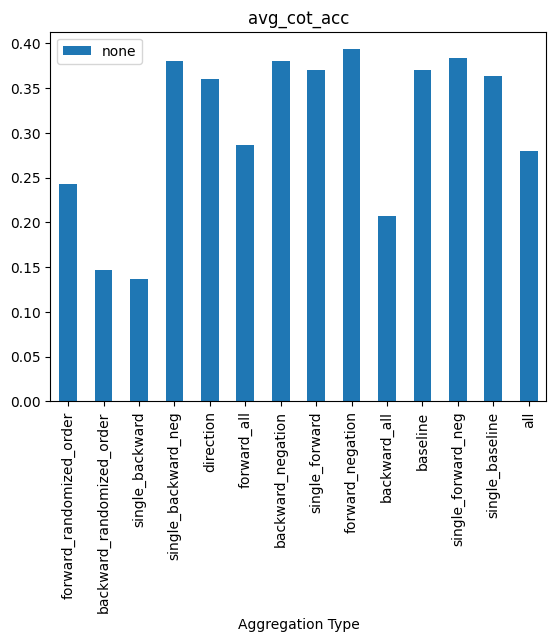

In [15]:
metric = "avg_cot_acc"
plot_bar_chart(metric, columns, metrics_dict, aggregation_types, merge_cot_types)

## Individual eval

In [24]:
FILES = {
        'forward_0': 'forward_1_shot_temp_0.0_seed_1234.pkl',
        'forward_1': 'forward_randomized_order_1_shot_temp_0.0_seed_1234.pkl',
        'forward_2': 'forward_randomized_order_1_shot_temp_0.0_seed_12345.pkl',
        'backward_0': 'backward_1_shot_temp_0.0_seed_1234.pkl',
        'backward_1': 'backward_randomized_order_1_shot_temp_0.0_seed_1234.pkl',
        'backward_2': 'backward_randomized_order_1_shot_temp_0.0_seed_12345.pkl',
        'forward_neg': 'forward_negated_1_shot_temp_0.0_seed_1234.pkl',
        'backward_neg': 'backward_negated_1_shot_temp_0.0_seed_1234.pkl',
        'baseline_seed1234': 'baseline_1_shot_temp_0.7_seed_1234.pkl',
        'baseline_seed5678': 'baseline_1_shot_temp_0.7_seed_5678.pkl',
        'baseline_seed910': 'baseline_1_shot_temp_0.7_seed_910.pkl',
        'forward_ltsbs': 'forward_ltsbs_1_shot_temp_0.0_seed_1234.pkl',
        'forward_ltsbs_0.7': 'forward_ltsbs_1_shot_temp_0.7_seed_1234.pkl',
        'forward_0.7': 'forward_1_shot_temp_0.7_seed_1234.pkl',
        'forward_neg_ltsbs': 'forward_negated_ltsbs_1_shot_temp_0.0_seed_1234.pkl',
        'forward_neg_ltsbs_0.7': 'forward_negated_ltsbs_1_shot_temp_0.7_seed_1234.pkl',
        'backward_ltsbs': 'backward_ltsbs_1_shot_temp_0.0_seed_1234.pkl',
        'backward_neg_ltsbs': 'forward_negated_ltsbs_1_shot_temp_0.0_seed_1234.pkl',
    }

OUTPUT_ROOT = "/sailhome/esui/cs224u_final_project/prontoqa_output/fictional"

def get_metrics_dict_for_prompt_type(prompt_type):
    if prompt_type == "forward":
        path = FILES['forward_0']
    elif prompt_type == "backward":
        path = FILES['backward_0']
    elif prompt_type == "forward_neg":
        path = FILES['forward_neg']
    elif prompt_type == "backward_neg":
        path = FILES['backward_neg']
    elif prompt_type == "baseline":
        path = FILES['baseline_seed1234']
    elif prompt_type in ["forward_0.7", "forward_ltsbs", "forward_ltsbs_0.7", "forward_neg_ltsbs", "forward_neg_ltsbs_0.7", "backward_ltsbs", "backward_neg_ltsbs"]:
        path = FILES[prompt_type]
    else:
        raise NotImplementedError(f'prompt_type {prompt_type} not queried')

    path = os.path.join(OUTPUT_ROOT, 'converted', path)

    metrics_dict = get_simple_eval_metrics(path)
    return metrics_dict

def get_data_for_all_metrics(metrics_dict, prompt_types):
    data = []
    for metric in metrics_dict[prompt_types[0]].keys():
        data_metric = [metric]
        for prompt_type in prompt_types:
            data_metric.append(metrics_dict[prompt_type][metric])
        data.append(data_metric)
    return data

              metric  baseline  forward_ltsbs  backward_ltsbs   
0      avg_label_acc  0.920000       0.903333        0.776667  \
1        avg_cot_acc  0.320000       0.330000        0.060000   
2  avg_cot_precision  0.777833       0.767877        0.638747   
3     avg_cot_recall  0.819192       0.827677        0.657937   
4         avg_cot_f1  0.790320       0.788543        0.632611   

   backward_neg_ltsbs  forward_neg_ltsbs  
0            0.926667           0.926667  
1            0.336667           0.336667  
2            0.780013           0.780013  
3            0.835108           0.835108  
4            0.798937           0.798937  


<Axes: title={'center': 'individual eval no path selection'}, xlabel='metric'>

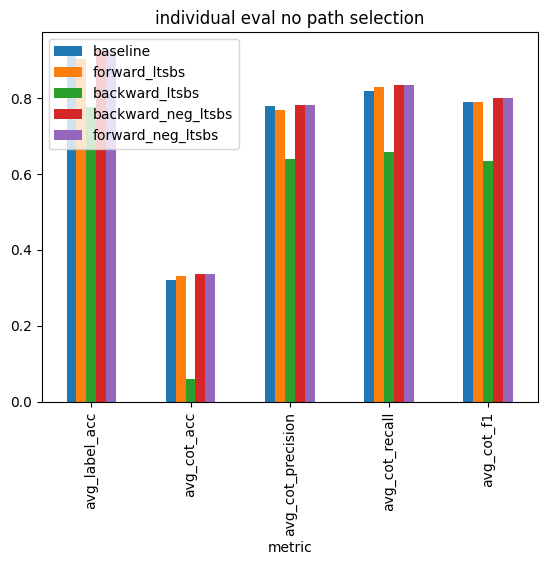

In [25]:
PROMPT_TYPES = ["baseline", "forward_ltsbs", "backward_ltsbs", "backward_neg_ltsbs", "forward_neg_ltsbs"]
columns = ["metric"] + PROMPT_TYPES
metrics_dict = {}
for prompt_type in PROMPT_TYPES:
    metrics_dict[prompt_type] = get_metrics_dict_for_prompt_type(prompt_type)

data = get_data_for_all_metrics(metrics_dict, PROMPT_TYPES)

metrics_df = pd.DataFrame(
            columns=columns,
            data=data
)

print(metrics_df)

metrics_df.plot(x='metric',
    kind='bar',
    stacked=False,
    title="individual eval no path selection"
)